In [4]:
import pandas as pd
import numpy as np
waveheight_df = pd.read_csv('data/WaveHeights.csv')
waveheight_df

,SU,Site,WaveHeight
0,524288,Daytona,0.808940
1,526336,Daytona,0.900698
2,528384,Daytona,0.843221
3,530432,Daytona,0.821583
4,532480,Daytona,0.861189
...,...,...,...
55588,30138368,EastDutch,0.726859
55589,30140416,EastDutch,0.806273
55590,30142464,EastDutch,0.775389
55591,30144512,EastDutch,0.766839


In [5]:
waveheight_list = []
su_list = []
for i in range(len(waveheight_df)):
    if waveheight_df.iloc[i]['Site'] == 'Daytona':
        waveheight_list.append(waveheight_df.iloc[i]['WaveHeight'])
        su_list.append(waveheight_df.iloc[i]['SU'])

In [6]:
waveheight_arr = np.array(waveheight_list)[:1000].reshape(-1,1)
su_arr = np.array(su_list)[:1000].reshape(-1,1)

### Python基本作图 (matplotlib库)

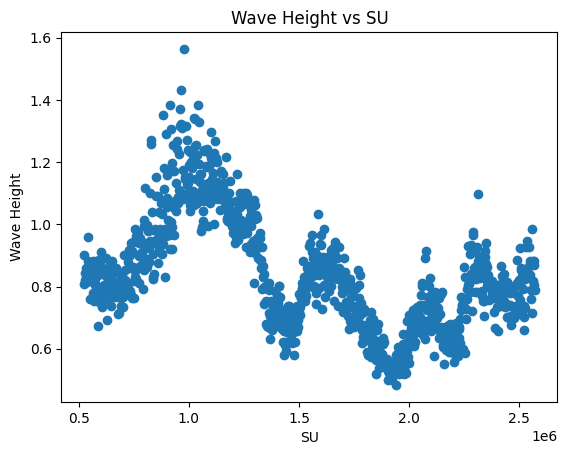

In [16]:
import matplotlib.pyplot as plt
plt.scatter(su_arr,waveheight_arr)
plt.title('Wave Height vs SU')
plt.xlabel('SU')
plt.ylabel('Wave Height')
plt.show()

In [10]:
from sklearn.linear_model import BayesianRidge, ARDRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
ard_poly = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    ARDRegression(),
).fit(su_arr,waveheight_arr)
brr_poly = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    BayesianRidge(),
).fit(su_arr,waveheight_arr)


/Users/creative/opt/anaconda3/envs/statistic-homework/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/creative/opt/anaconda3/envs/statistic-homework/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
y_ard, y_ard_std = ard_poly.predict(su_arr, return_std=True)
y_brr, y_brr_std = brr_poly.predict(su_arr, return_std=True)

### Python高级作图(Seaborn库)

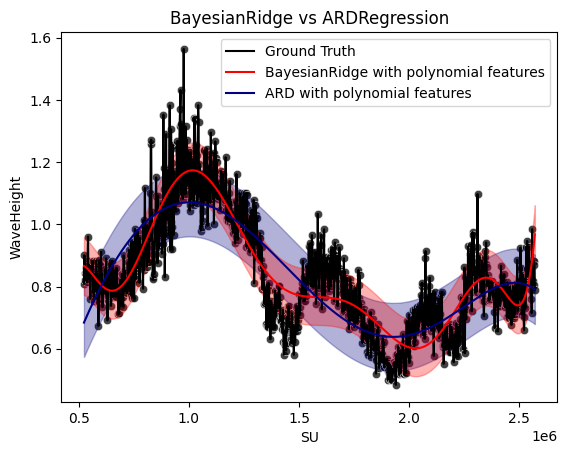

In [15]:
import seaborn as sns

ax = sns.scatterplot(
    data=waveheight_df[:1000], x="SU", y="WaveHeight", color="black", alpha=0.75
)
ax.plot(su_arr, waveheight_arr, color="black", label="Ground Truth")
ax.plot(su_arr, y_brr, color="red", label="BayesianRidge with polynomial features")
ax.plot(su_arr, y_ard, color="navy", label="ARD with polynomial features")
ax.fill_between(
    su_arr.ravel(),
    y_ard - y_ard_std,
    y_ard + y_ard_std,
    color="navy",
    alpha=0.3,
)
ax.fill_between(
    su_arr.ravel(),
    y_brr - y_brr_std,
    y_brr + y_brr_std,
    color="red",
    alpha=0.3,
)
ax.legend()
_ = ax.set_title("BayesianRidge vs ARDRegression")